In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import plot_tree
import seaborn as sns

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=4, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

In [5]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

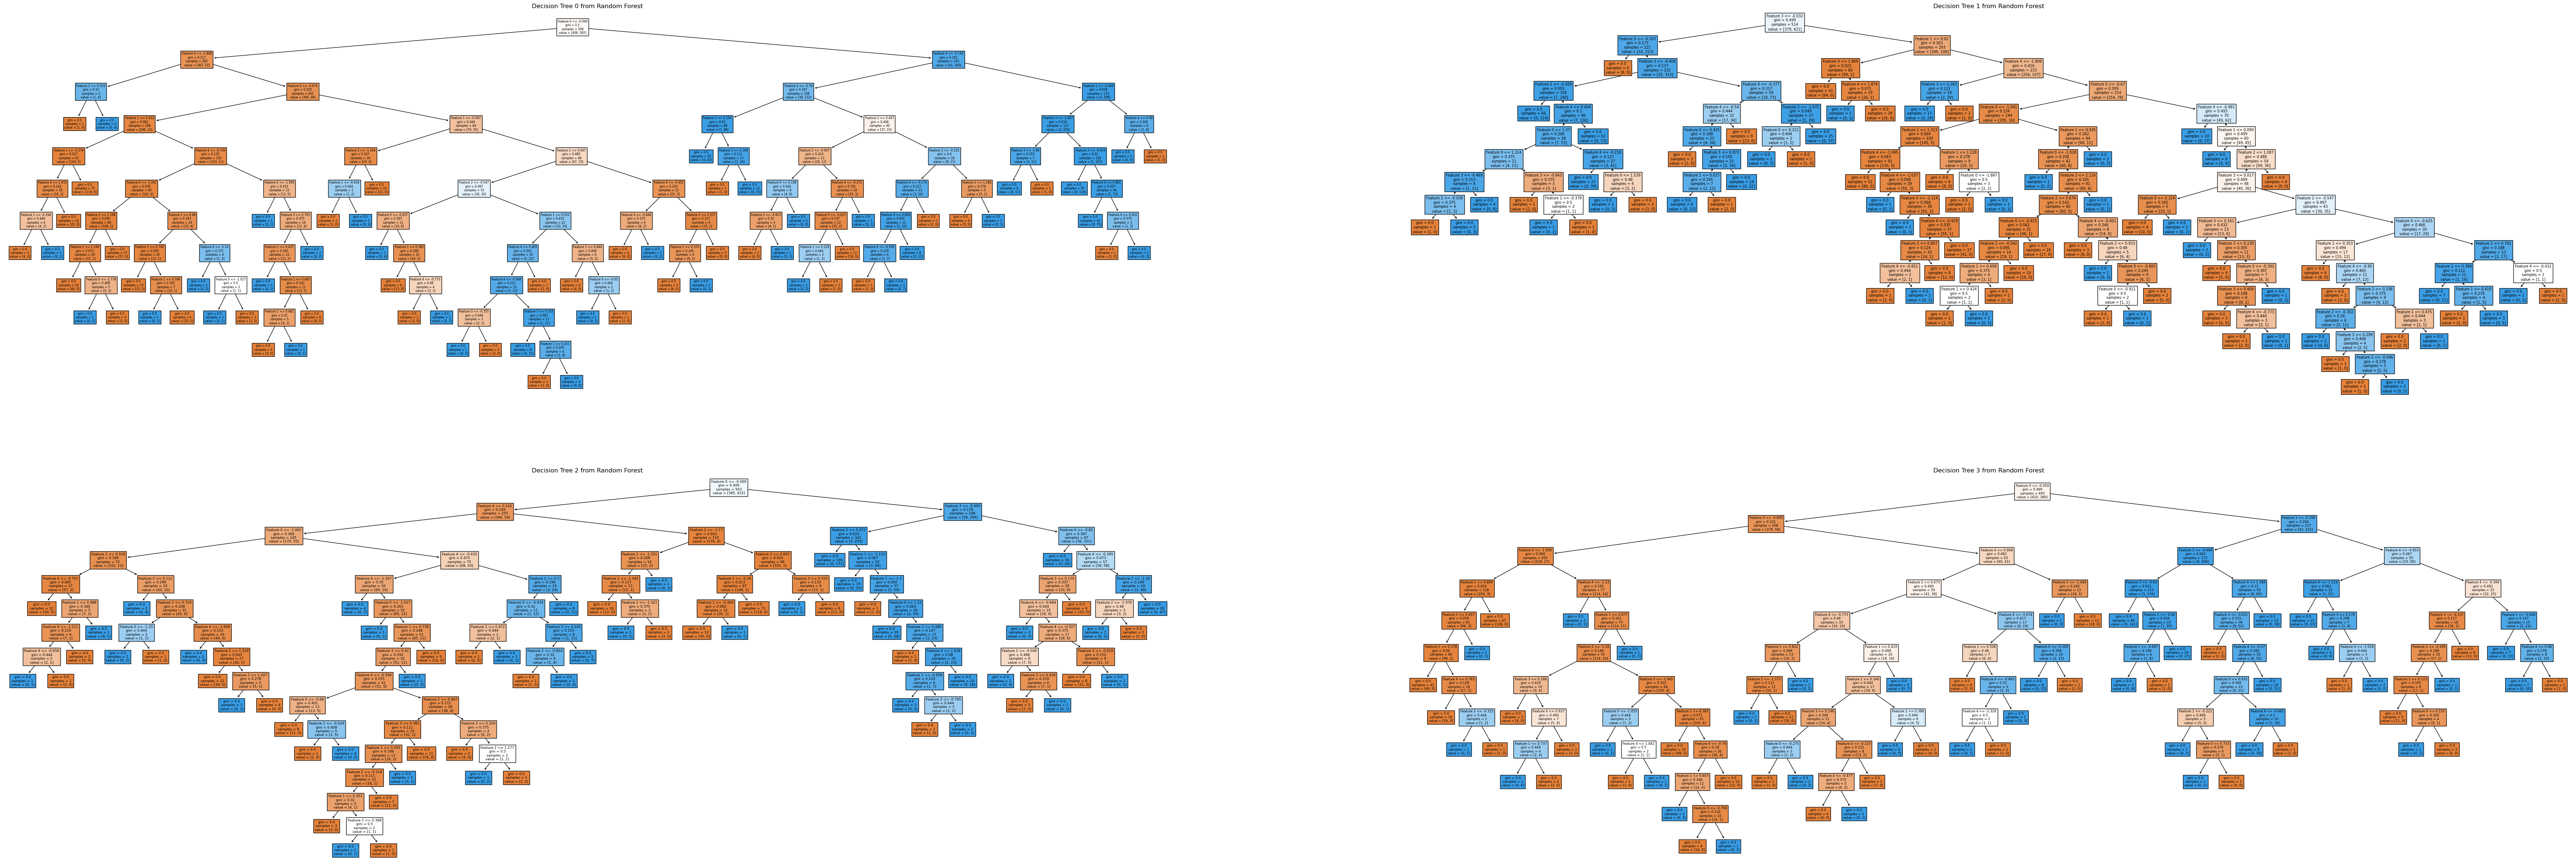

In [6]:
# Visualize the decision trees in the Random Forest
_, axes= plt.subplots(2,2, figsize=(90,30))
for i in range(4):
    plot_tree(rf_classifier.estimators_[i], filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])], ax= axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Decision Tree {i} from Random Forest")

### Examples on voting

In [7]:
for i in range(4):
    dt= rf_classifier.estimators_[i]
    print(f"Decision Tree no. {i}:", " "*5, "|", dt.predict([X_test[21]])[0])

print('-'*35)
print("Random Forest predection: ", "|", rf_classifier.predict([X_test[21]])[0])

Decision Tree no. 0:       | 1.0
Decision Tree no. 1:       | 1.0
Decision Tree no. 2:       | 0.0
Decision Tree no. 3:       | 1.0
-----------------------------------
Random Forest predection:  | 1


In [8]:
for i in range(4):
    dt= rf_classifier.estimators_[i]
    print(f"Decision Tree no. {i}:", " "*5, "|", dt.predict([X_test[20]])[0])

print('-'*35)
print("Random Forest predection: ", "|", rf_classifier.predict([X_test[20]])[0])

Decision Tree no. 0:       | 0.0
Decision Tree no. 1:       | 0.0
Decision Tree no. 2:       | 1.0
Decision Tree no. 3:       | 1.0
-----------------------------------
Random Forest predection:  | 0


### Demonstrating Feature importance

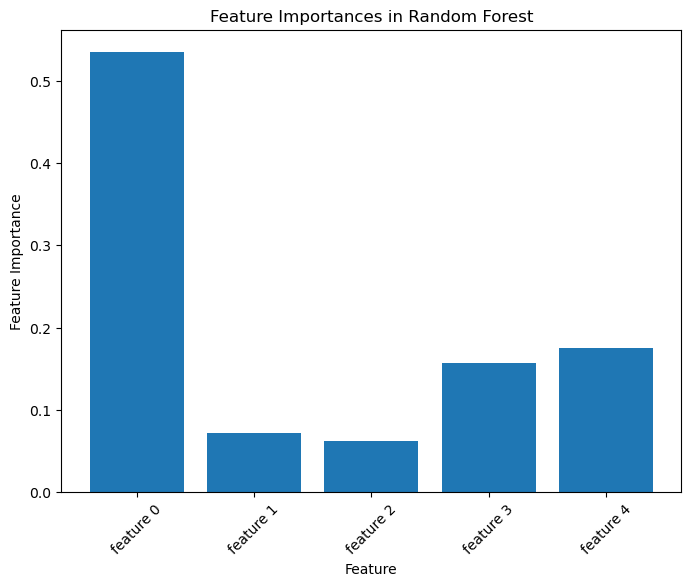

In [9]:
RF_feature_importances = rf_classifier.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), RF_feature_importances, tick_label=['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4'])
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances in Random Forest")
plt.xticks(rotation=45)
plt.show()

[0.67747482 0.07480667 0.0757736  0.02879754 0.14314736]
[0.18448709 0.09255397 0.04909022 0.48321749 0.19065124]
[0.62004493 0.04316157 0.07047017 0.06091077 0.20541257]
[0.66010148 0.07346843 0.05118989 0.05383879 0.16140141]


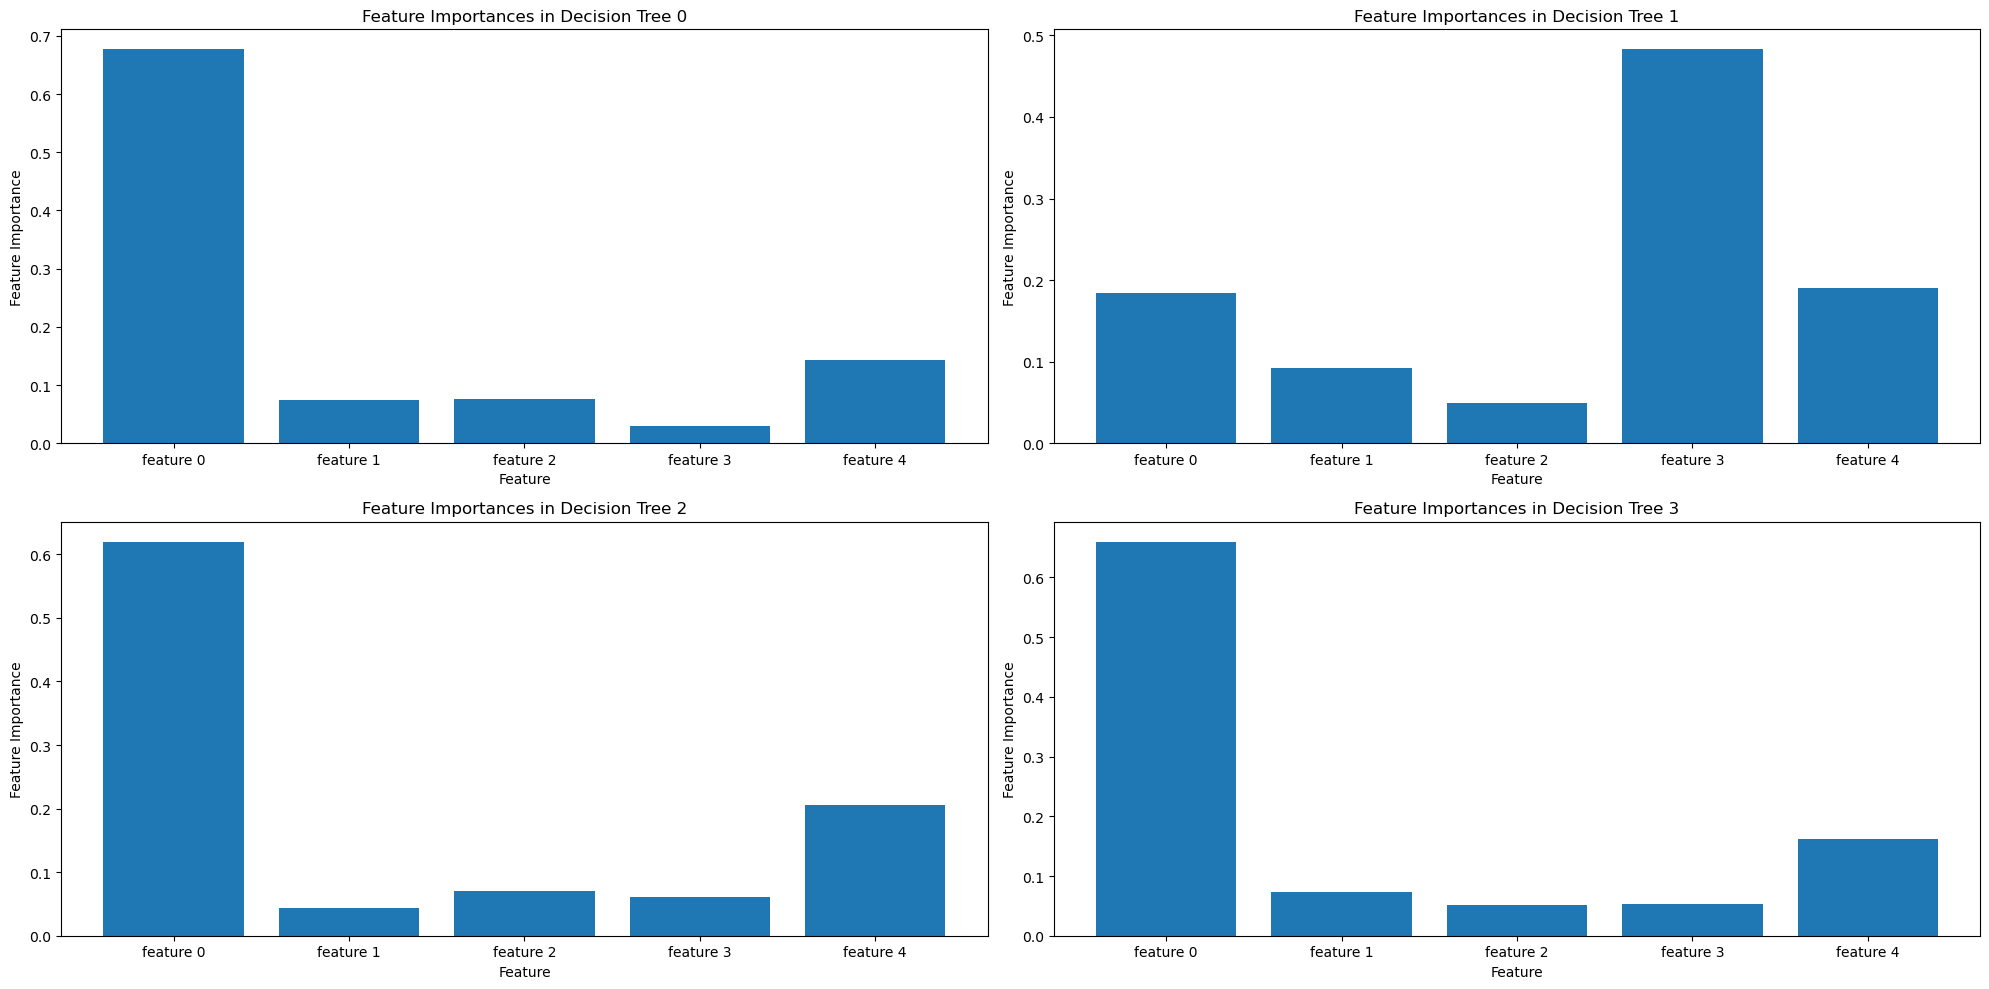

In [10]:
_, axes= plt.subplots(2,2, figsize=(20,10))
for i in range(4):
    feature_importances = rf_classifier.estimators_[i].feature_importances_
    axes[i//2, i%2].bar(range(X.shape[1]), feature_importances, tick_label=['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4'])
    print(feature_importances)
    axes[i//2, i%2].set_xlabel("Feature")
    axes[i//2, i%2].set_ylabel("Feature Importance")
    axes[i//2, i%2].set_title(f"Feature Importances in Decision Tree {i}")
plt.tight_layout()

In [11]:

all_importances= np.array([[0.67747482 ,0.07480667, 0.0757736,  0.02879754, 0.14314736],
[0.18448709, 0.09255397, 0.04909022, 0.48321749, 0.19065124],
[0.62004493, 0.04316157, 0.07047017, 0.06091077, 0.20541257],
[0.66010148, 0.07346843, 0.05118989, 0.05383879, 0.16140141]])
all_importances.mean(axis= 0)

array([0.53552708, 0.07099766, 0.06163097, 0.15669115, 0.17515314])

In [12]:
RF_feature_importances

array([0.53552708, 0.07099766, 0.06163097, 0.15669115, 0.17515315])

### Evaluate the model

In [13]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-score:", f1)

Accuracy: 0.89
F1-score: 0.89


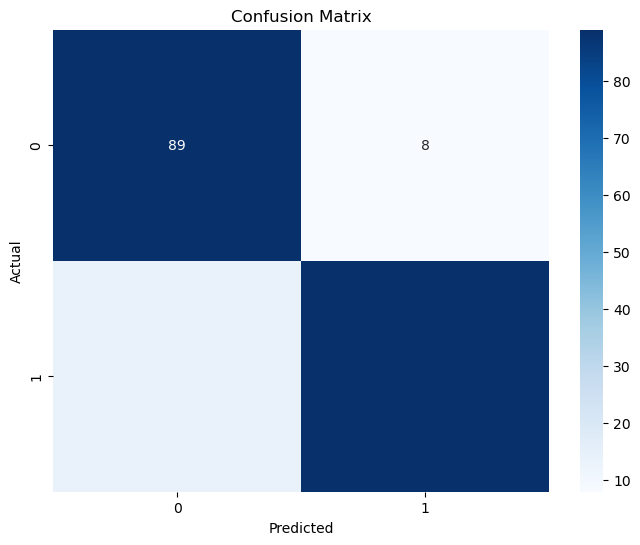

In [14]:
confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()